# *`Overview`*

- Nama : Airlangga Bayu Taqwa
- NRP : 5026221204
- Kelas : PBA A Gasal 2025
- Dosen Pengampu : Dr. Ir. Aris Tjahyanto, M.Kom.

---

## ***Definisi***

  Eksplorasi Analisis Sentimen Ulasan Pengguna Aplikasi Transportasi InDrive Menggunakan Algoritma Machine Learning

## ***Tujuan***

  Tugas ini bertujuan untuk membangun, mengevaluasi, dan meningkatkan model klasifikasi sentimen guna mengidentifikasi pandangan (positif, negatif, atau netral) pengguna terhadap layanan dan fitur yang disediakan oleh Aplikasi Transportasi InDrive, berdasarkan ulasan yang dikumpulkan dari platform publik.

# *Scrapping Data*

In [2]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [3]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [4]:
from google_play_scraper import reviews, Sort

app_id = 'sinet.startup.inDriver'

def get_reviews(
    app_id,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=2000,
    continuation_token=None
    ):
    try:
      result, continuation_token = reviews(
        app_id,
        lang=lang,
        country=country,
        sort=sort,
        count=count,
        continuation_token=continuation_token
      )

      return result, continuation_token
    except Exception as e:
      print(e)
      return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
  print("Jumlah ulasan:", len(reviews))
  if len(reviews) > 0:
    print("Contoh ulasan:")
    print(reviews[0])

else:
  print("Tidak ada ulasan ditemukan.")

Jumlah ulasan: 2000
Contoh ulasan:
{'reviewId': '04a585db-376f-4664-b820-b66d6128e2e0', 'userName': 'Riko Sahril', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjX34513NDUE1Nvvu8Tu2rLFoqFNc15Gla3jXSTGoWLp1V-Djq60', 'content': 'tanpa kejelasan akun di blokir . padahal ga punya salah . katanya ada indikasi orderan fiktif . masa ada yang suka sama kita tiap Kastemer order pengennya kita ga boleh walaupun tiap hari . padahal ga di OFLAININ', 'score': 1, 'thumbsUpCount': 2, 'reviewCreatedVersion': '5.146.0', 'at': datetime.datetime(2025, 11, 3, 15, 1, 6), 'replyContent': 'Halo, terima kasih atas umpan balik Anda mengenai masalah pemblokiran akun. Kejelasan dalam situasi ini sangat penting. Kami telah mengeskalasikan masalah ini untuk ditindaklanjuti. Jika Anda memiliki informasi lebih lanjut, silakan bagikan dengan tim dukungan kami di support@indrive.com. Terima kasih, semoga pengalaman Anda ke depan lebih baik!', 'repliedAt': datetime.datetime(2025, 11, 3, 18, 42, 4), 'appVe

In [6]:
import csv

if reviews is not None and len(reviews) > 0:
  reviews_df = pd.DataFrame(reviews)
  # Select and rename columns
  reviews_df = reviews_df[['reviewId', 'userName', 'score', 'content', 'at']]
  reviews_df = reviews_df.rename(columns={
      'reviewId': 'Review ID',
      'userName': 'Username',
      'score': 'Rating',
      'content': 'Review Text',
      'at': 'Date'
  })
  reviews_df.to_csv('hasil_scraper_ulasan_app_indrive.csv', index=False)
  print("Reviews saved to hasil_scraper_ulasan_app_indrive.csv")
  display(reviews_df.head())
else:
  print("No reviews to save.")

Reviews saved to hasil_scraper_ulasan_app_indrive.csv


,Review ID,Username,Rating,Review Text,Date
0,04a585db-376f-4664-b820-b66d6128e2e0,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,2025-11-03 15:01:06
1,1981aa5a-715f-474a-b654-4eaa2168e82d,Agil Tum,1,di kota Garut gaada autobid nya,2025-11-03 15:00:02
2,d069f6db-7166-455e-8b9c-df4865c3e661,Willy Ibrahim,5,bagus,2025-11-03 14:36:30
3,31b5aae5-583d-4f42-8c02-33d5a8908191,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",2025-11-03 14:29:59
4,eb5c74f1-afef-46cb-ad19-e810e82310eb,MUCHAMAD KHAMIM MARIYANTO,5,nice,2025-11-03 14:00:24


# *Preprocessing Data*

In [7]:
import pandas as pd

data = pd.read_csv('hasil_scraper_ulasan_app_indrive.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
 4   Date         2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [8]:
df = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal..."
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice


## ***Hapus Data Duplikat***
---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2000 non-null   object
 1   Username     2000 non-null   object
 2   Rating       2000 non-null   int64 
 3   Review Text  2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [10]:
df.drop_duplicates(subset = "Review Text", keep = 'first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561 entries, 0 to 1998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1561 non-null   object
 1   Username     1561 non-null   object
 2   Rating       1561 non-null   int64 
 3   Review Text  1561 non-null   object
dtypes: int64(1), object(3)
memory usage: 61.0+ KB


## ***Data Cleaning***
---

In [11]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove symbols and numbers, keep letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase (case folding)
    text = text.lower()
    return text


df['Cleaned Review Text'] = df['Review Text'].apply(clean_text)

In [12]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,tanpa kejelasan akun di blokir padahal ga pun...
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya,di kota garut gaada autobid nya
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus,bagus
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",dari bulan agustus oktober sy mengalami hal g...
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice,nice
5,2025-11-03 13:58:17,Gilang Rindra,5,pekerjaan yang flexibel,pekerjaan yang flexibel
6,2025-11-03 12:54:29,Ervina Agustina,1,"sangat"" buruk",sangat buruk
7,2025-11-03 12:50:09,Riza Iza,1,𝗚𝗔𝗥𝗢𝗕𝗟𝗢𝗚 𝗗𝗥𝗜𝗩𝗘𝗥 𝗡𝗔 𝗢𝗟𝗢 𝗢𝗟𝗢,
8,2025-11-03 12:28:09,samsung bachri,1,posisi aplikasi Autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos nya ga tau mana...
9,2025-11-03 11:55:17,Surati,5,"pelayanan yg baik, ramah dan pas dikantong.",pelayanan yg baik ramah dan pas dikantong


## ***Normalized Data***
Merevisi kata yang tidak baku menjadi baku

> sy -> saya

---

In [14]:
import pandas as pd

def normalize_word(text, formal_word_dict):
    words = text.split()
    normalized_words = [formal_word_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Load the informal to formal word dictionary from the Excel file
try:
    informal_to_formal_df = pd.read_excel('kamuskatabaku.xlsx')
    # The Excel file has two columns: 'informal' and 'formal'
    formal_word_dict = dict(zip(informal_to_formal_df['tidak_baku'], informal_to_formal_df['kata_baku']))

    df['Normalized Review Text'] = df['Cleaned Review Text'].apply(lambda x: normalize_word(x, formal_word_dict))

except FileNotFoundError:
    print("Error: 'kata_tidak_baku.xlsx' not found. Please upload the file.")
except KeyError:
    print("Error: The Excel file should contain columns named 'tidak_baku' and 'baku'.")
except Exception as e:
    print(f"An error occurred: {e}")

In [15]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,tanpa kejelasan akun di blokir padahal ga pun...,tanpa kejelasan akun di blokir padahal tidak p...
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya,di kota garut gaada autobid nya,di kota garut tidak ada autobid ya
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus,bagus,bagus
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",dari bulan agustus oktober sy mengalami hal g...,dari bulan agustus oktober saya mengalami hal ...
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice,nice,nice
5,2025-11-03 13:58:17,Gilang Rindra,5,pekerjaan yang flexibel,pekerjaan yang flexibel,pekerjaan yang flexibel
6,2025-11-03 12:54:29,Ervina Agustina,1,"sangat"" buruk",sangat buruk,sangat buruk
7,2025-11-03 12:50:09,Riza Iza,1,𝗚𝗔𝗥𝗢𝗕𝗟𝗢𝗚 𝗗𝗥𝗜𝗩𝗘𝗥 𝗡𝗔 𝗢𝗟𝗢 𝗢𝗟𝗢,,
8,2025-11-03 12:28:09,samsung bachri,1,posisi aplikasi Autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos ya tidak tau ma...
9,2025-11-03 11:55:17,Surati,5,"pelayanan yg baik, ramah dan pas dikantong.",pelayanan yg baik ramah dan pas dikantong,pelayanan yang baik ramah dan pas dikantong


## ***Tokenize***

Tokenisasi adalah proses memecah aliran teks menjadi unit-unit yang lebih kecil yang disebut token.

> "Ajaib cepat sekali!" dipecah menjadi token: ['Ajaib', 'cepat', 'sekali', '!']


---

In [16]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['Normalized Review Text'].apply(tokenize)

In [17]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,tanpa kejelasan akun di blokir padahal ga pun...,tanpa kejelasan akun di blokir padahal tidak p...,"[tanpa, kejelasan, akun, di, blokir, padahal, ..."
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya,di kota garut gaada autobid nya,di kota garut tidak ada autobid ya,"[di, kota, garut, tidak, ada, autobid, ya]"
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus,bagus,bagus,[bagus]
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",dari bulan agustus oktober sy mengalami hal g...,dari bulan agustus oktober saya mengalami hal ...,"[dari, bulan, agustus, oktober, saya, mengalam..."
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice,nice,nice,[nice]
5,2025-11-03 13:58:17,Gilang Rindra,5,pekerjaan yang flexibel,pekerjaan yang flexibel,pekerjaan yang flexibel,"[pekerjaan, yang, flexibel]"
6,2025-11-03 12:54:29,Ervina Agustina,1,"sangat"" buruk",sangat buruk,sangat buruk,"[sangat, buruk]"
7,2025-11-03 12:50:09,Riza Iza,1,𝗚𝗔𝗥𝗢𝗕𝗟𝗢𝗚 𝗗𝗥𝗜𝗩𝗘𝗥 𝗡𝗔 𝗢𝗟𝗢 𝗢𝗟𝗢,,,[]
8,2025-11-03 12:28:09,samsung bachri,1,posisi aplikasi Autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos ya tidak tau ma...,"[posisi, aplikasi, autobid, ongkos, ya, tidak,..."
9,2025-11-03 11:55:17,Surati,5,"pelayanan yg baik, ramah dan pas dikantong.",pelayanan yg baik ramah dan pas dikantong,pelayanan yang baik ramah dan pas dikantong,"[pelayanan, yang, baik, ramah, dan, pas, dikan..."


## ***StopWord Removal***

Stopword removal adalah proses menghapus kata-kata yang umum atau sering muncul yang biasanya tidak membawa makna sentimen atau informasi yang signifikan.

> Dalam kalimat "aplikasi yang cepat dan bagus untuk investasi", kata-kata 'yang', 'dan', 'untuk' akan dihapus, menyisakan 'aplikasi', 'cepat', 'bagus', 'investasi'.

---

In [18]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Stopword Removal'] = df['tokenize'].apply(lambda x:remove_stopwords(x))

In [20]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize,Stopword Removal
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,tanpa kejelasan akun di blokir padahal ga pun...,tanpa kejelasan akun di blokir padahal tidak p...,"[tanpa, kejelasan, akun, di, blokir, padahal, ...","[kejelasan, akun, blokir, salah, indikasi, ord..."
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya,di kota garut gaada autobid nya,di kota garut tidak ada autobid ya,"[di, kota, garut, tidak, ada, autobid, ya]","[kota, garut, autobid, ya]"
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus,bagus,bagus,[bagus],[bagus]
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",dari bulan agustus oktober sy mengalami hal g...,dari bulan agustus oktober saya mengalami hal ...,"[dari, bulan, agustus, oktober, saya, mengalam...","[agustus, oktober, mengalami, ganjil, order, m..."
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice,nice,nice,[nice],[nice]
5,2025-11-03 13:58:17,Gilang Rindra,5,pekerjaan yang flexibel,pekerjaan yang flexibel,pekerjaan yang flexibel,"[pekerjaan, yang, flexibel]","[pekerjaan, flexibel]"
6,2025-11-03 12:54:29,Ervina Agustina,1,"sangat"" buruk",sangat buruk,sangat buruk,"[sangat, buruk]",[buruk]
7,2025-11-03 12:50:09,Riza Iza,1,𝗚𝗔𝗥𝗢𝗕𝗟𝗢𝗚 𝗗𝗥𝗜𝗩𝗘𝗥 𝗡𝗔 𝗢𝗟𝗢 𝗢𝗟𝗢,,,[],[]
8,2025-11-03 12:28:09,samsung bachri,1,posisi aplikasi Autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos ya tidak tau ma...,"[posisi, aplikasi, autobid, ongkos, ya, tidak,...","[posisi, aplikasi, autobid, ongkos, ya, tau, m..."
9,2025-11-03 11:55:17,Surati,5,"pelayanan yg baik, ramah dan pas dikantong.",pelayanan yg baik ramah dan pas dikantong,pelayanan yang baik ramah dan pas dikantong,"[pelayanan, yang, baik, ramah, dan, pas, dikan...","[pelayanan, ramah, pas, dikantong]"


## ***Stemming Data***

Stemming adalah proses dalam NLP di mana kata-kata ditransformasikan menjadi bentuk dasarnya (root word).

**Bertujuan** agar model dapat mengenali bahwa variasi kata yang berbeda merujuk pada konsep atau makna yang serupa, sehingga **mengurangi redundansi fitur** dalam kamus.

> Kata "**membersihkan**" akan diubah menjadi "**bersih**"

> Notes: Saat run, kemungkinan butuh waktu yang lama, jadi harap bersabar🫰


---

In [21]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.0 MB/s eta 0:00:00


In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words

df['Stemming Data'] = df['Stopword Removal'].apply(lambda x: ' '.join(stem_text(x)))

In [23]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize,Stopword Removal,Stemming Data
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,tanpa kejelasan akun di blokir padahal ga pun...,tanpa kejelasan akun di blokir padahal tidak p...,"[tanpa, kejelasan, akun, di, blokir, padahal, ...","[kejelasan, akun, blokir, salah, indikasi, ord...",jelas akun blokir salah indikasi order fiktif ...
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya,di kota garut gaada autobid nya,di kota garut tidak ada autobid ya,"[di, kota, garut, tidak, ada, autobid, ya]","[kota, garut, autobid, ya]",kota garut autobid ya
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus,bagus,bagus,[bagus],[bagus],bagus
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",dari bulan agustus oktober sy mengalami hal g...,dari bulan agustus oktober saya mengalami hal ...,"[dari, bulan, agustus, oktober, saya, mengalam...","[agustus, oktober, mengalami, ganjil, order, m...",agustus oktober alami ganjil order masuk chat ...
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice,nice,nice,[nice],[nice],nice
5,2025-11-03 13:58:17,Gilang Rindra,5,pekerjaan yang flexibel,pekerjaan yang flexibel,pekerjaan yang flexibel,"[pekerjaan, yang, flexibel]","[pekerjaan, flexibel]",kerja flexibel
6,2025-11-03 12:54:29,Ervina Agustina,1,"sangat"" buruk",sangat buruk,sangat buruk,"[sangat, buruk]",[buruk],buruk
7,2025-11-03 12:50:09,Riza Iza,1,𝗚𝗔𝗥𝗢𝗕𝗟𝗢𝗚 𝗗𝗥𝗜𝗩𝗘𝗥 𝗡𝗔 𝗢𝗟𝗢 𝗢𝗟𝗢,,,[],[],
8,2025-11-03 12:28:09,samsung bachri,1,posisi aplikasi Autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos ya tidak tau ma...,"[posisi, aplikasi, autobid, ongkos, ya, tidak,...","[posisi, aplikasi, autobid, ongkos, ya, tau, m...",posisi aplikasi autobid ongkos ya tau tawar on...
9,2025-11-03 11:55:17,Surati,5,"pelayanan yg baik, ramah dan pas dikantong.",pelayanan yg baik ramah dan pas dikantong,pelayanan yang baik ramah dan pas dikantong,"[pelayanan, yang, baik, ramah, dan, pas, dikan...","[pelayanan, ramah, pas, dikantong]",layan ramah pas kantong


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561 entries, 0 to 1998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1561 non-null   object
 1   Username                1561 non-null   object
 2   Rating                  1561 non-null   int64 
 3   Review Text             1561 non-null   object
 4   Cleaned Review Text     1561 non-null   object
 5   Normalized Review Text  1561 non-null   object
 6   tokenize                1561 non-null   object
 7   Stopword Removal        1561 non-null   object
 8   Stemming Data           1561 non-null   object
dtypes: int64(1), object(8)
memory usage: 154.2+ KB


In [25]:
df.to_csv('Hasil_Preprocessing_Data.csv', encoding='utf8', index=False)

## ***EDA***

---

In [26]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['Rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['Rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['Rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['Rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['Rating']==5.0])} rows")

Input data has 1561 rows and 9 columns
rating 1.0 = 433 rows
rating 2.0 = 72 rows
rating 3.0 = 94 rows
rating 4.0 = 96 rows
rating 5.0 = 866 rows


Total Ulasan: 1561 reviews
------------------------------
Jumlah Ulasan Berdasarkan Rating:
  Rating 5: 866 reviews
  Rating 4: 96 reviews
  Rating 3: 94 reviews
  Rating 2: 72 reviews
  Rating 1: 433 reviews
------------------------------


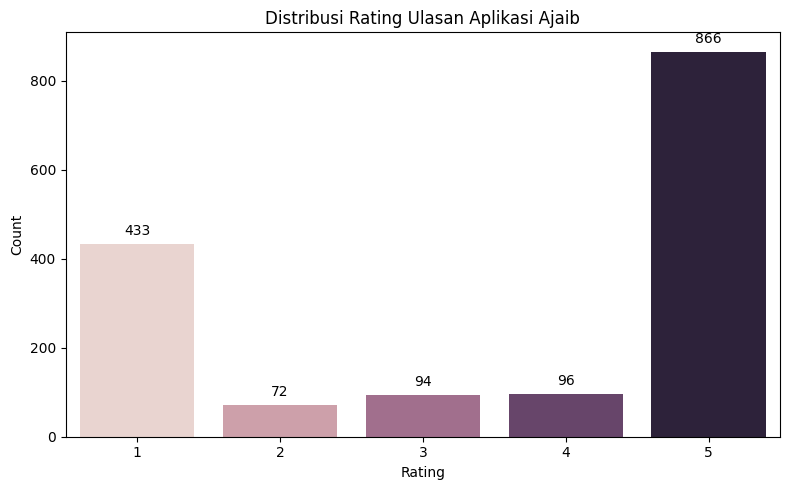

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Perhitungan Statistik ---

# 1. Hitung Total Ulasan
total_ulasan = len(df)

# 2. Hitung Jumlah Ulasan per Rating
rating_counts = df['Rating'].value_counts().sort_index(ascending=False) # Menghitung dan mengurutkan dari Rating 5 ke 1

# --- Menampilkan Statistik (Text Output) ---
print(f"Total Ulasan: {total_ulasan} reviews")
print("-" * 30)

print("Jumlah Ulasan Berdasarkan Rating:")
for rating, count in rating_counts.items():
    print(f"  Rating {rating}: {count} reviews")

print("-" * 30)

# --- Visualisasi (Countplot) ---
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Rating', data=df, hue='Rating', legend=False)

# Tambahkan anotasi (angka) di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x = p.get_x() + p.get_width() / 2.,
        y = height + 20,
        s = f'{height:.0f}',
        ha = 'center'
    )

plt.title('Distribusi Rating Ulasan Aplikasi Ajaib')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ***WordCloud setelah Preprocessing***

---

In [28]:
from wordcloud import WordCloud

In [29]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0)]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0)]
#convert to list
negative_list=df_negative['Stemming Data'].tolist()
positive_list= df_positive['Stemming Data'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

## ***Word Cloud: Positive Reviews***

---

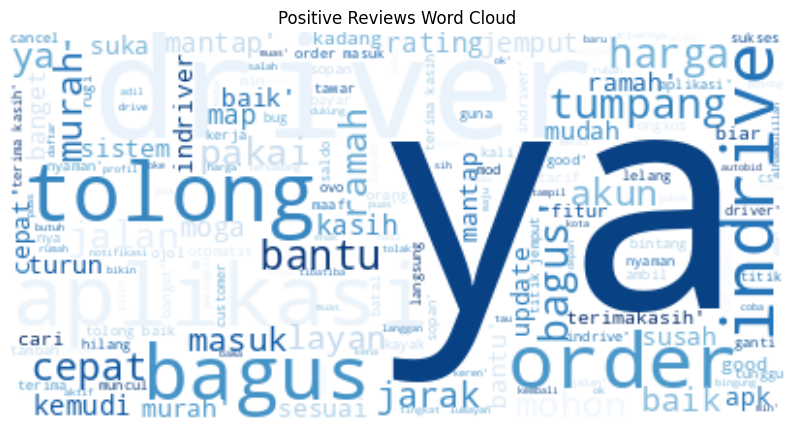

In [30]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

## ***Word Cloud: Negative Reviews***

---

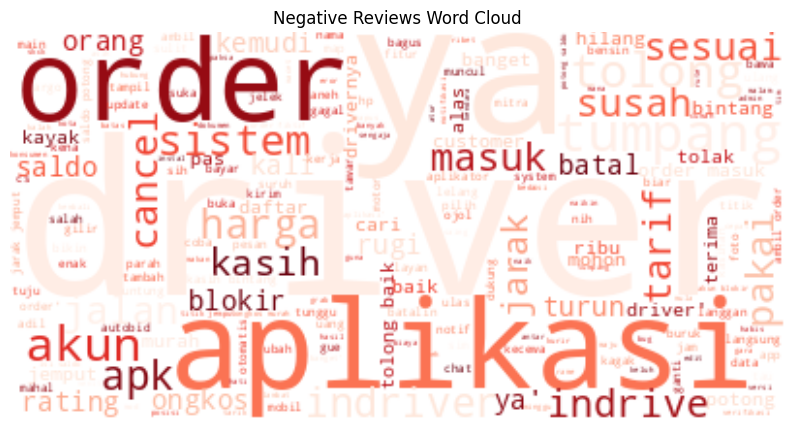

In [31]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

# ***Frequency of review text***

---

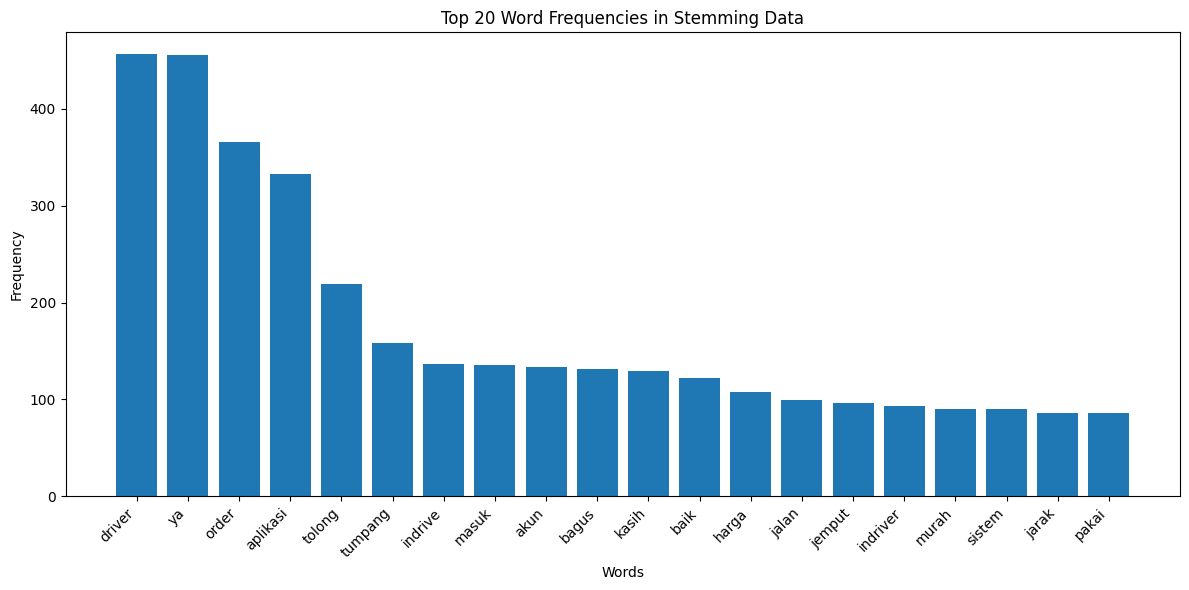

In [32]:
import matplotlib.pyplot as plt
from collections import Counter

def visualize_word_frequency(df, text_column, n=20):
    """
    Visualizes the frequency of the most common words in a text column of a DataFrame.

    (df, 'Stemming Data', n=20)

    Args:
        df (pd.DataFrame): The input DataFrame.
        text_column (str): The name of the column containing the preprocessed text (as a single string).
        n (int): The number of top words to display.
    """
    # Combine all text into a single string
    all_text = ' '.join(df[text_column].astype(str).tolist())

    # Tokenize the text (split into words)
    words = all_text.split()

    # Count word frequencies
    word_counts = Counter(words)

    # Get most common words
    most_common_words = word_counts.most_common(n)

    if not most_common_words:
        print("No words to display frequency for.")
        return

    words, counts = zip(*most_common_words)

    # Create Bar Chart
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n} Word Frequencies in {text_column}')
    plt.tight_layout()
    plt.show()

visualize_word_frequency(df, 'Stemming Data', n=20)

# ***Labeling Data***

---

In [33]:
def label_from_rating(rating):
    if rating >= 4:
        return 'Positif'
    elif rating <= 3:
        return 'Negatif'

# Terapkan fungsi ini pada kolom Rating
df['Sentiment_Rating_Label'] = df['Rating'].apply(label_from_rating)

print("\nDistribusi Label Hasil Rating:")
print(df['Sentiment_Rating_Label'].value_counts())


Distribusi Label Hasil Rating:
Sentiment_Rating_Label
Positif    962
Negatif    599
Name: count, dtype: int64


In [34]:
df.head(10)

,Date,Username,Rating,Review Text,Cleaned Review Text,Normalized Review Text,tokenize,Stopword Removal,Stemming Data,Sentiment_Rating_Label
0,2025-11-03 15:01:06,Riko Sahril,1,tanpa kejelasan akun di blokir . padahal ga pu...,tanpa kejelasan akun di blokir padahal ga pun...,tanpa kejelasan akun di blokir padahal tidak p...,"[tanpa, kejelasan, akun, di, blokir, padahal, ...","[kejelasan, akun, blokir, salah, indikasi, ord...",jelas akun blokir salah indikasi order fiktif ...,Negatif
1,2025-11-03 15:00:02,Agil Tum,1,di kota Garut gaada autobid nya,di kota garut gaada autobid nya,di kota garut tidak ada autobid ya,"[di, kota, garut, tidak, ada, autobid, ya]","[kota, garut, autobid, ya]",kota garut autobid ya,Negatif
2,2025-11-03 14:36:30,Willy Ibrahim,5,bagus,bagus,bagus,[bagus],[bagus],bagus,Positif
3,2025-11-03 14:29:59,Mulyana Adhy,3,"Dari bulan Agustus - Oktober, sy mengalami hal...",dari bulan agustus oktober sy mengalami hal g...,dari bulan agustus oktober saya mengalami hal ...,"[dari, bulan, agustus, oktober, saya, mengalam...","[agustus, oktober, mengalami, ganjil, order, m...",agustus oktober alami ganjil order masuk chat ...,Negatif
4,2025-11-03 14:00:24,MUCHAMAD KHAMIM MARIYANTO,5,nice,nice,nice,[nice],[nice],nice,Positif
5,2025-11-03 13:58:17,Gilang Rindra,5,pekerjaan yang flexibel,pekerjaan yang flexibel,pekerjaan yang flexibel,"[pekerjaan, yang, flexibel]","[pekerjaan, flexibel]",kerja flexibel,Positif
6,2025-11-03 12:54:29,Ervina Agustina,1,"sangat"" buruk",sangat buruk,sangat buruk,"[sangat, buruk]",[buruk],buruk,Negatif
7,2025-11-03 12:50:09,Riza Iza,1,𝗚𝗔𝗥𝗢𝗕𝗟𝗢𝗚 𝗗𝗥𝗜𝗩𝗘𝗥 𝗡𝗔 𝗢𝗟𝗢 𝗢𝗟𝗢,,,[],[],,Negatif
8,2025-11-03 12:28:09,samsung bachri,1,posisi aplikasi Autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos nya ga tau mana...,posisi aplikasi autobid ongkos ya tidak tau ma...,"[posisi, aplikasi, autobid, ongkos, ya, tidak,...","[posisi, aplikasi, autobid, ongkos, ya, tau, m...",posisi aplikasi autobid ongkos ya tau tawar on...,Negatif
9,2025-11-03 11:55:17,Surati,5,"pelayanan yg baik, ramah dan pas dikantong.",pelayanan yg baik ramah dan pas dikantong,pelayanan yang baik ramah dan pas dikantong,"[pelayanan, yang, baik, ramah, dan, pas, dikan...","[pelayanan, ramah, pas, dikantong]",layan ramah pas kantong,Positif


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1561 entries, 0 to 1998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    1561 non-null   object
 1   Username                1561 non-null   object
 2   Rating                  1561 non-null   int64 
 3   Review Text             1561 non-null   object
 4   Cleaned Review Text     1561 non-null   object
 5   Normalized Review Text  1561 non-null   object
 6   tokenize                1561 non-null   object
 7   Stopword Removal        1561 non-null   object
 8   Stemming Data           1561 non-null   object
 9   Sentiment_Rating_Label  1561 non-null   object
dtypes: int64(1), object(9)
memory usage: 166.4+ KB


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'Stemming Data' is the column with preprocessed text
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Stemming Data'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (1561, 2634)


In [37]:
from sklearn.model_selection import train_test_split

# Assuming 'tfidf_matrix' is your features and 'Sentiment_Rating_Label' is your target variable
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,
    df['Sentiment_Rating_Label'],
    test_size=0.2, # You can adjust the test set size (e.g., 0.2 for 20%)
    random_state=42, # Set a random state for reproducibility
    stratify=df['Sentiment_Rating_Label'] # Stratify to maintain the proportion of classes
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1248, 2634)
Shape of X_test: (313, 2634)
Shape of y_train: (1248,)
Shape of y_test: (313,)


## ***Algoritma : Multinomial Naive Bayes***

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

     Negatif       0.77      0.62      0.69       120
     Positif       0.79      0.89      0.83       193

    accuracy                           0.78       313
   macro avg       0.78      0.75      0.76       313
weighted avg       0.78      0.78      0.78       313



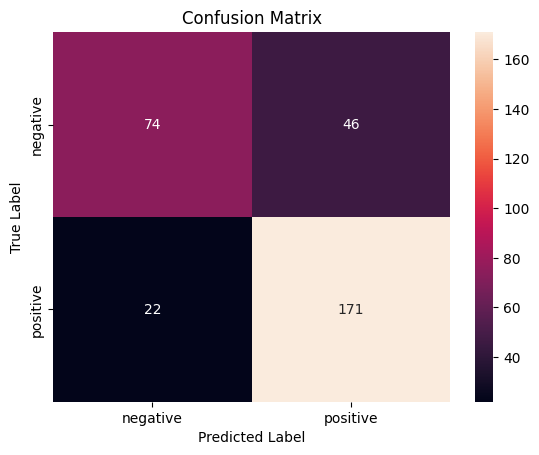

In [39]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
naive_bayes_pred = classifier.predict(X_test)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Algoritma: Random Forest Classifier**

              precision    recall  f1-score   support

     Negatif       0.76      0.71      0.73       120
     Positif       0.83      0.86      0.84       193

    accuracy                           0.80       313
   macro avg       0.79      0.78      0.79       313
weighted avg       0.80      0.80      0.80       313



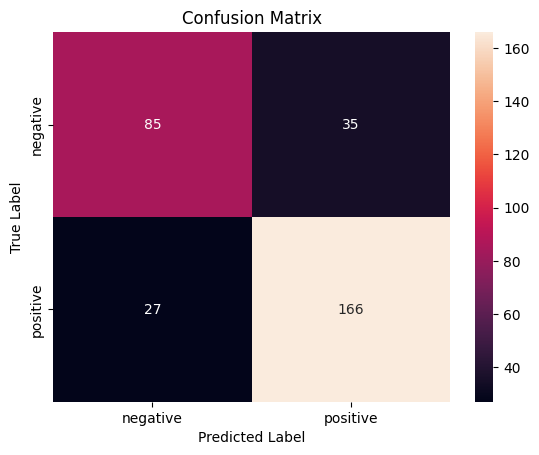

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train, y_train)
random_forest_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: Logistic Regression***

              precision    recall  f1-score   support

     Negatif       0.76      0.65      0.70       120
     Positif       0.80      0.88      0.84       193

    accuracy                           0.79       313
   macro avg       0.78      0.76      0.77       313
weighted avg       0.79      0.79      0.79       313



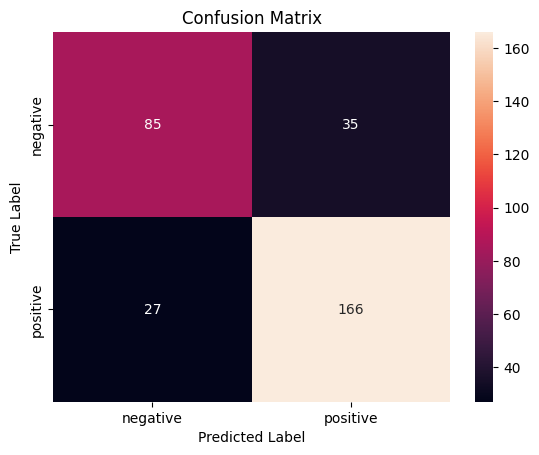

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
log_reg_pred = classifier.predict(X_test)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: Support Vector Machine (SVM)***

              precision    recall  f1-score   support

     Negatif       0.77      0.69      0.73       120
     Positif       0.82      0.87      0.84       193

    accuracy                           0.80       313
   macro avg       0.79      0.78      0.79       313
weighted avg       0.80      0.80      0.80       313



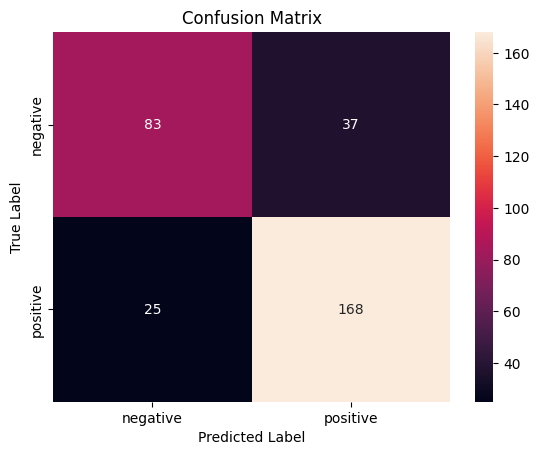

In [42]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
svm_pred = classifier.predict(X_test)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: K-Nearest Neighbor (KNN)***

              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00       120
     Positif       0.62      1.00      0.76       193

    accuracy                           0.62       313
   macro avg       0.31      0.50      0.38       313
weighted avg       0.38      0.62      0.47       313



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


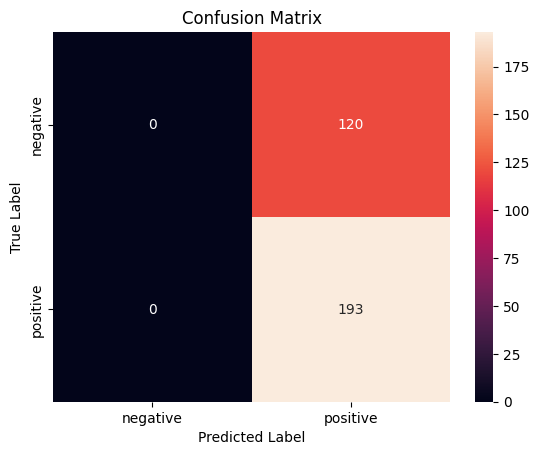

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
knn_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## ***Algoritma: Extra Trees Classifier***

              precision    recall  f1-score   support

     Negatif       0.72      0.72      0.72       120
     Positif       0.83      0.82      0.83       193

    accuracy                           0.79       313
   macro avg       0.77      0.77      0.77       313
weighted avg       0.79      0.79      0.79       313



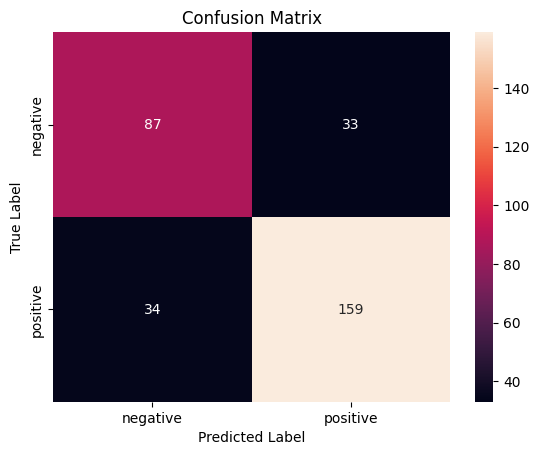

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train, y_train)
extra_trees_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Performing K-Fold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]

# Define scorers with pos_label
precision_scorer = make_scorer(precision_score, pos_label='Positif')
recall_scorer = make_scorer(recall_score, pos_label='Positif')
f1_scorer = make_scorer(f1_score, pos_label='Positif')

scoring = {
    'accuracy': 'accuracy',
    'precision': precision_scorer,
    'recall': recall_scorer,
    'f1': f1_scorer
}

for model, name in zip(models, names):
    print(name)
    for score_name, scorer in scoring.items():
        cv_score = cross_val_score(model, X_train, y_train, scoring=scorer, cv=10).mean()
        print(f" {score_name} - {cv_score} ")
    print()

Naive Bayes
 accuracy - 0.7660387096774194 
 precision - 0.7689924207966047 
 recall - 0.8894224196855776 
 f1 - 0.8242038630054909 

Logistic Regression
 accuracy - 0.7596451612903226 
 precision - 0.7682095461052909 
 recall - 0.8751537935748462 
 f1 - 0.8177349222669236 

Random Forest
 accuracy - 0.7869032258064517 
 precision - 0.8031919746438806 
 recall - 0.8582535885167463 
 f1 - 0.8227760280852692 

SVM
 accuracy - 0.773258064516129 
 precision - 0.7999871467096213 
 recall - 0.8439507860560491 
 f1 - 0.8208236583244926 

KNN
 accuracy - 0.6177935483870968 
 precision - 0.617557880933648 
 recall - 0.9974025974025974 
 f1 - 0.7628050414131641 

Extra Trees
 accuracy - 0.7885161290322581 
 precision - 0.8182299263346604 
 recall - 0.8465823650034177 
 f1 - 0.831060020874879 



Extra Trees adalah model terbaik karena memiliki F1-Score cross-validation tertinggi (0.8310), menunjukkan kinerja yang paling seimbang dan stabil.

# ***Predictions***

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Asumsi: df sudah dimuat dan kolom 'Sentiment_Rating_Label' hanya berisi 'Positif' dan 'Negatif'.

# 1. Persiapan Data Target Biner
# Pastikan y hanya mengandung 'Positif' dan 'Negatif'
y_binary = df[df['Sentiment_Rating_Label'].isin(['Positif', 'Negatif'])]['Sentiment_Rating_Label']

# Filter teks yang sesuai dengan y_binary
X_text = df[df['Sentiment_Rating_Label'].isin(['Positif', 'Negatif'])]['Stemming Data']

# 2. Ekstraksi Fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_text)
X = tfidf_matrix

# 3. Pembagian Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary # Wajib menggunakan stratify karena data tidak seimbang
)

print(f"Shape of X_train (Features): {X_train.shape}")
print(f"Shape of y_train (Labels): {y_train.shape}")

Shape of X_train (Features): (1248, 2634)
Shape of y_train (Labels): (1248,)



--- Kinerja Model Extra Trees (Model Terbaik) ---
              precision    recall  f1-score   support

     Negatif       0.72      0.72      0.72       120
     Positif       0.82      0.83      0.83       193

    accuracy                           0.79       313
   macro avg       0.77      0.77      0.77       313
weighted avg       0.79      0.79      0.79       313



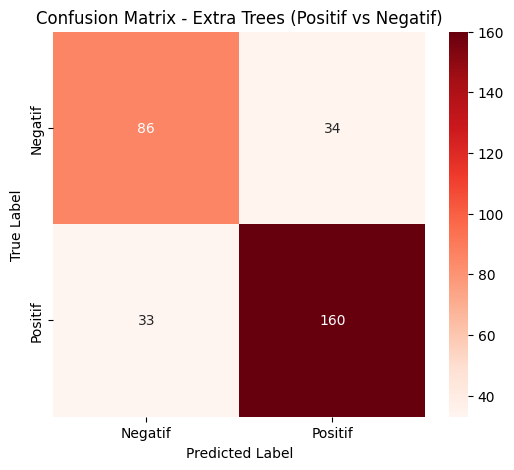

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# A. Inisialisasi dan Latih Model Extra Trees
# Menggunakan n_estimators=150 dan random_state untuk reproduktifitas
et_classifier = ExtraTreesClassifier(n_estimators=150, random_state=42)
et_classifier.fit(X_train, y_train)

# B. Prediksi pada Data Uji
et_pred = et_classifier.predict(X_test)

# C. Classification Report (Kinerja Kuantitatif)
target_names = ['Negatif', 'Positif']

print("\n--- Kinerja Model Extra Trees (Model Terbaik) ---")
print(classification_report(
    y_test,
    et_pred,
    target_names=target_names,
    zero_division=0 # Mengatasi UndefinedMetricWarning
))


# D. Visualisasi Confusion Matrix (Kinerja Kualitatif)
cm = confusion_matrix(y_test, et_pred)
df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)

plt.figure(figsize=(6, 5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Extra Trees (Positif vs Negatif)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()